In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import factorial
import scipy.stats as stats 
from scipy.stats import poisson
import math as m

In [2]:
df = pd.read_table('pmm_q3.tsv', header=None)
x = df.iloc[:, 0].to_numpy()
n = x.shape[0]

In [3]:
lambda1 = np.append(np.arange(0.6, 6.0, 0.25), 6.0)
lambda2 = np.append(np.arange(0.6, 6.0, 0.25), 6.0)
ln = lambda1.shape[0]
loglikelihoods = np.zeros((lambda1.shape[0], lambda2.shape[0]))
for i in range(ln):
    for j in range(ln):
        loglikelihoods[i][j] = np.sum(np.log(0.5 * poisson.pmf(x, lambda1[i]) + 0.5 * poisson.pmf(x, lambda2[j])))

lambda 1 estimate:  0.9794654161479059
lambda 2 estimate:  3.1873226301437367


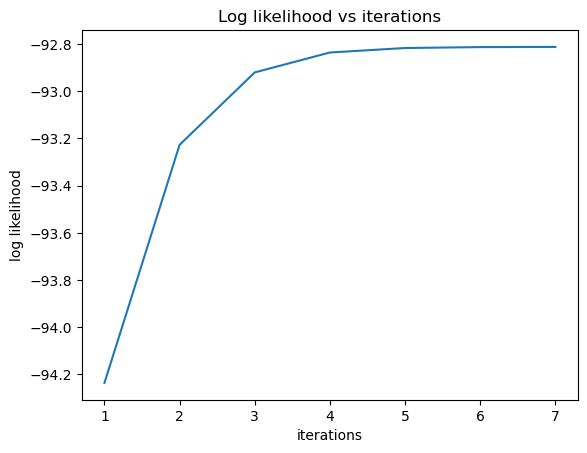

In [4]:
l1_x = []
l2_y = []
l = [0.6, 1]
K = 2
w = np.zeros((n, K))
eps = 1e-3  # Convergence threshold
max_iter = 1000

# Visualization
llikelihoods = []
iters = [] 

# Stop when the absolute change in log-likelihood is < eps
it = 0
ll = prev_ll = None
while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
    
    # E-step
    for i in range(K):
        w[:, i] = 0.5 * poisson.pmf(x, l[i])
    w /= w.sum(axis=1)[:, None]

    # M-step
    for i in range(K):
        l[i] = (x.dot(w[:, i])) / sum(w[:, i])

    it += 1
    prev_ll = ll
    p_xz = np.zeros(w.shape)
    for i in range(K):
        p_xz[:, i] = 0.5 * poisson.pmf(x, l[i])
    
    # The ELBO
    # ll = np.sum(w*np.log(p_xz/w))
    
    # The actual ll
    ll = np.sum(np.log(0.5 * poisson.pmf(x, l[0]) + 0.5 * poisson.pmf(x, l[1])))

    # The actual ll (alt code)
    # ll = np.sum(np.log(p_xz.sum(axis=1)))
    
    # For the Visual
    llikelihoods.append(ll)
    l1_x.append(l[0])
    l2_y.append(l[1])
    iters.append(it)

plt.plot(iters, llikelihoods)
plt.title("Log likelihood vs iterations")
plt.xlabel("iterations")
plt.ylabel("log likelihood")
print("lambda 1 estimate: ", l[0])
print("lambda 2 estimate: ", l[1])

In [5]:
# lls = np.zeros((len(l1_x), len(l2_y)))
# for i in range(len(l1_x)):
#     lls[i][i] = llikelihoods[i]

# plt.plot(lls[0])

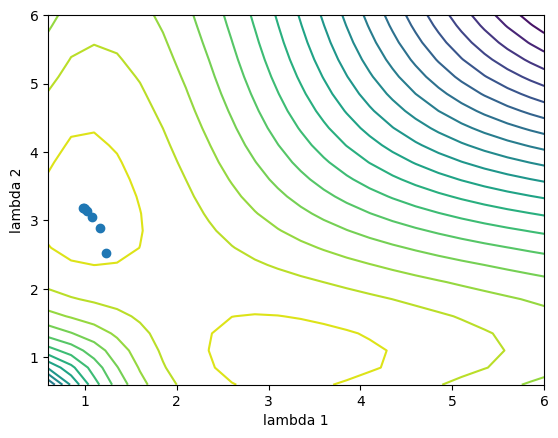

In [9]:
fig, ax = plt.subplots()
ax.set_ylabel('lambda 2')
ax.set_xlabel('lambda 1')
plt.plot(l1_x, l2_y, 'o')
CS = ax.contour(lambda1, lambda2, loglikelihoods, levels=20)
